In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

In [13]:
dataset = pd.read_csv('weight_dataset.csv')


In [12]:
dataset

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [14]:
dataset['Height']= dataset.Height.apply(lambda val : 2.54*val)
dataset['Weight']= dataset.Weight.apply(lambda val: 0.45359237*val)

In [15]:
dataset.head(10)

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
5,Male,170.822660,69.042272
6,Male,174.714106,83.428287
7,Male,173.605229,76.190414
8,Male,170.228132,79.800252
9,Male,161.179495,70.941700


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [17]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228114
std,9.772721,14.564143
min,137.828359,29.347484
25%,161.304276,61.606032
50%,168.447898,73.124954
75%,175.702625,84.898668
max,200.656806,122.465267


<Axes: xlabel='Height', ylabel='Weight'>

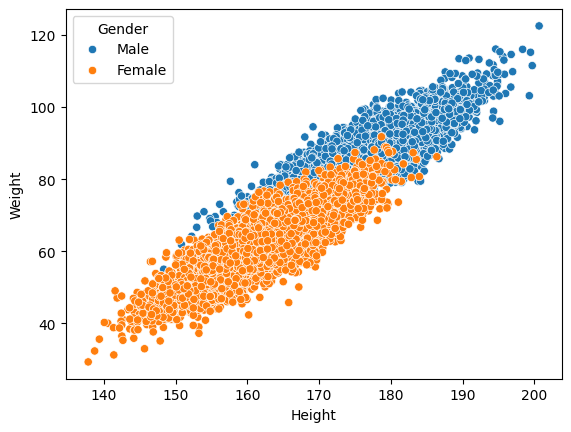

In [18]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=dataset)

In [20]:
dataset['Gender'].replace('Female',0, inplace=True)
dataset['Gender'].replace('Male',1, inplace=True)

/tmp/ipykernel_20209/2530924357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace('Female',0, inplace=True)
/tmp/ipykernel_20209/2530924357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [21]:
x_train,x_test, y_train,y_test = train_test_split(dataset.drop('Weight',axis=1), dataset.Weight, test_size=0.2, random_state=101)

In [22]:
regressor = XGBRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = regressor.predict(x_test)

print(f'MAE = {mean_absolute_error(y_test,y_pred)}')

MAE = 3.8255937755073584


In [24]:
print(f'XG Boost Regressor is about {round(regressor.score(x_test,y_test)*100)}% accurate!')

XG Boost Regressor is about 89% accurate!
